In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

print(train_df.shape)
print(test_df.shape)

(348978, 51)
(523466, 50)


In [3]:
train_cnn_df = pd.read_csv("./cnn_203_train.csv")
test_cnn_df = pd.read_csv("./cnn_203_test.csv")

train_df = train_df.merge(train_cnn_df, on='transaction_id', how='left')
test_df = test_df.merge(test_cnn_df, on='transaction_id', how='left')

In [4]:
train_df.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target,cnn_score
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0.067122
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0.073221
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0.130756
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0.085901
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0.073685


In [5]:
train_df['target'].value_counts(normalize=True)

0    0.892922
1    0.107078
Name: target, dtype: float64

In [6]:
all_df = pd.concat([train_df, test_df])
print(all_df.shape)

(872444, 52)


In [7]:
def reindex(feature, all_df):
    print(all_df[feature].nunique())
    
    all_df[feature].fillna('fillna', inplace=True)
    sort_df = all_df[[feature, 'target']].groupby(feature).mean().sort_values('target', ascending = False)
    sort_df = sort_df.reset_index()
    sort_df.fillna(0, inplace=True)

    sort_df.columns = [feature, feature + '_ord']

    all_df = pd.merge(all_df, sort_df, on=feature, how='left')
    all_df.drop(feature, axis=1, inplace=True)
    
    return all_df

for i in range(1, 19):
    feature = 'cat_var_{}'.format(i)
    print(feature)
    all_df = reindex(feature, all_df)

cat_var_1
537
cat_var_2
63
cat_var_3
620
cat_var_4
2
cat_var_5
2
cat_var_6
518
cat_var_7
23
cat_var_8
465
cat_var_9
5
cat_var_10
23
cat_var_11
5
cat_var_12
5
cat_var_13
52
cat_var_14
12
cat_var_15
2
cat_var_16
2
cat_var_17
2
cat_var_18
2


In [8]:
all_df.head()

,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_26,cat_var_27,cat_var_28,...,cat_var_9_ord,cat_var_10_ord,cat_var_11_ord,cat_var_12_ord,cat_var_13_ord,cat_var_14_ord,cat_var_15_ord,cat_var_16_ord,cat_var_17_ord,cat_var_18_ord
0,0,1,1,0,0,1,0,0,0,0,...,0.085836,0.119645,0.105381,0.088998,0.061338,0.082919,0.091505,0.104208,0.080321,0.075871
1,1,0,1,0,0,1,0,0,0,0,...,0.104339,0.120059,0.105381,0.089568,0.085506,0.082919,0.139786,0.104208,0.080321,0.148568
2,1,0,1,0,0,1,0,0,0,0,...,0.104339,0.089990,0.101736,0.084628,0.082338,0.082919,0.091505,0.104208,0.080321,0.075871
3,1,0,1,0,0,1,0,0,0,0,...,0.108109,0.125237,0.105381,0.088998,0.067260,0.089439,0.091505,0.104208,0.080321,0.075871
4,1,0,1,0,0,1,0,0,0,0,...,0.108109,0.113577,0.105820,0.089568,0.085506,0.082919,0.139786,0.104208,0.080321,0.148568


In [9]:
numeric_features = all_df.columns
numeric_features = numeric_features.drop(['transaction_id', 'target'])
numeric_features = numeric_features.drop([
    'cat_var_19',
    'cat_var_20',
    'cat_var_21',
    'cat_var_22',
    'cat_var_23',
    'cat_var_24',
    'cat_var_25',
    'cat_var_26',
    'cat_var_27',
    'cat_var_28',
    'cat_var_29',
    'cat_var_30',
    'cat_var_31',
    'cat_var_32',
    'cat_var_33',
    'cat_var_34',
    'cat_var_35',
    'cat_var_36',
    'cat_var_37',
    'cat_var_38',
    'cat_var_39',
    'cat_var_40',
    'cat_var_41',
    'cat_var_42',
])

numeric_features = numeric_features.drop([
    'num_var_3',
    'cat_var_11_ord',
    'cat_var_10_ord',
    'cat_var_15_ord',
    'cat_var_14_ord',    
    'cat_var_7_ord',
    'cat_var_4_ord',
    'cat_var_5_ord'    
])

In [10]:
numeric_features

Index(['cnn_score', 'num_var_1', 'num_var_2', 'num_var_4', 'num_var_5',
       'num_var_6', 'num_var_7', 'cat_var_1_ord', 'cat_var_2_ord',
       'cat_var_3_ord', 'cat_var_6_ord', 'cat_var_8_ord', 'cat_var_9_ord',
       'cat_var_12_ord', 'cat_var_13_ord', 'cat_var_16_ord', 'cat_var_17_ord',
       'cat_var_18_ord'],
      dtype='object')

In [11]:
train_df = all_df[:348978]
test_df = all_df[348978:]

train_f_df = train_df[numeric_features]
test_f_df = test_df[numeric_features]

print(train_df.shape)
print(test_df.shape)

(348978, 52)
(523466, 52)


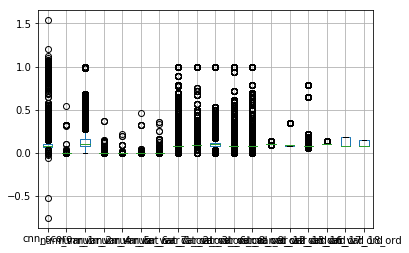

In [12]:
train_f_df.boxplot()

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

train_X, valid_X, train_y, valid_y = train_test_split(train_f_df.as_matrix(), 
                                                      train_df['target'].as_matrix(),
                                                      test_size=0.2,
                                                      random_state=42)

print(type(train_X))
print(type(valid_X))

print(train_X.shape)
print(valid_X.shape)                                           
print(train_y.shape)
print(valid_y.shape)

Using TensorFlow backend.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(279182, 18)
(69796, 18)
(279182,)
(69796,)


# Train

In [14]:
from catboost import Pool, CatBoostClassifier
model = CatBoostClassifier(iterations=2000, verbose=True, depth=6, od_type='Iter', od_wait=30, 
                           learning_rate=0.08,
                           loss_function = 'Logloss')

C:\opt\Anaconda3\lib\site-packages\catboost\core.py:1240: FutureWarning: The 'verbose' parameter is deprecated, use 'logging_level' parameter instead (posible values: 'Silent', 'Verbose', 'Info', 'Debug').
  super(CatBoostClassifier, self).__init__(params)


In [15]:
model = model.fit(train_X, train_y, eval_set=(valid_X, valid_y))

0: learn: 0.6119494	test: 0.6119248	bestTest: 0.6119248 (0)	total: 299ms	remaining: 9m 57s
1: learn: 0.5449869	test: 0.5449235	bestTest: 0.5449235 (1)	total: 554ms	remaining: 9m 13s
2: learn: 0.4923177	test: 0.4922458	bestTest: 0.4922458 (2)	total: 807ms	remaining: 8m 57s
3: learn: 0.450004	test: 0.449928	bestTest: 0.449928 (3)	total: 1.05s	remaining: 8m 46s
4: learn: 0.4138472	test: 0.4137692	bestTest: 0.4137692 (4)	total: 1.28s	remaining: 8m 31s
5: learn: 0.3856553	test: 0.3856393	bestTest: 0.3856393 (5)	total: 1.51s	remaining: 8m 22s
6: learn: 0.3629715	test: 0.3629715	bestTest: 0.3629715 (6)	total: 1.76s	remaining: 8m 20s
7: learn: 0.3447921	test: 0.3447816	bestTest: 0.3447816 (7)	total: 1.99s	remaining: 8m 16s
8: learn: 0.329159	test: 0.3291357	bestTest: 0.3291357 (8)	total: 2.29s	remaining: 8m 27s
9: learn: 0.3165302	test: 0.3165069	bestTest: 0.3165069 (9)	total: 2.57s	remaining: 8m 31s
10: learn: 0.3063478	test: 0.3063634	bestTest: 0.3063634 (10)	total: 2.81s	remaining: 8m 27s
1

90: learn: 0.2424705	test: 0.2436065	bestTest: 0.2436065 (90)	total: 23s	remaining: 8m 2s
91: learn: 0.2424196	test: 0.2435676	bestTest: 0.2435676 (91)	total: 23.2s	remaining: 8m 1s
92: learn: 0.2423552	test: 0.2435066	bestTest: 0.2435066 (92)	total: 23.4s	remaining: 8m
93: learn: 0.2423076	test: 0.2434736	bestTest: 0.2434736 (93)	total: 23.7s	remaining: 8m
94: learn: 0.2422707	test: 0.2434367	bestTest: 0.2434367 (94)	total: 24s	remaining: 8m
95: learn: 0.24219	test: 0.2433708	bestTest: 0.2433708 (95)	total: 24.2s	remaining: 8m
96: learn: 0.2421298	test: 0.2433082	bestTest: 0.2433082 (96)	total: 24.5s	remaining: 8m
97: learn: 0.2420948	test: 0.2432802	bestTest: 0.2432802 (97)	total: 24.7s	remaining: 7m 59s
98: learn: 0.24206	test: 0.2432595	bestTest: 0.2432595 (98)	total: 25s	remaining: 7m 59s
99: learn: 0.2419864	test: 0.2431969	bestTest: 0.2431969 (99)	total: 25.2s	remaining: 7m 58s
100: learn: 0.2419138	test: 0.2431454	bestTest: 0.2431454 (100)	total: 25.4s	remaining: 7m 57s
101: le

177: learn: 0.2382665	test: 0.2403072	bestTest: 0.2403072 (177)	total: 45.8s	remaining: 7m 48s
178: learn: 0.2382351	test: 0.2402828	bestTest: 0.2402828 (178)	total: 46s	remaining: 7m 48s
179: learn: 0.2381846	test: 0.2402351	bestTest: 0.2402351 (179)	total: 46.3s	remaining: 7m 47s
180: learn: 0.2381552	test: 0.2402199	bestTest: 0.2402199 (180)	total: 46.5s	remaining: 7m 47s
181: learn: 0.2381202	test: 0.240195	bestTest: 0.240195 (181)	total: 46.8s	remaining: 7m 47s
182: learn: 0.2381049	test: 0.2401825	bestTest: 0.2401825 (182)	total: 47.1s	remaining: 7m 47s
183: learn: 0.238067	test: 0.2401531	bestTest: 0.2401531 (183)	total: 47.4s	remaining: 7m 47s
184: learn: 0.238057	test: 0.2401509	bestTest: 0.2401509 (184)	total: 47.6s	remaining: 7m 47s
185: learn: 0.2380436	test: 0.2401454	bestTest: 0.2401454 (185)	total: 47.9s	remaining: 7m 47s
186: learn: 0.2380315	test: 0.2401383	bestTest: 0.2401383 (186)	total: 48.2s	remaining: 7m 47s
187: learn: 0.2380215	test: 0.2401323	bestTest: 0.240132

264: learn: 0.2363359	test: 0.2391318	bestTest: 0.2391318 (264)	total: 1m 8s	remaining: 7m 28s
265: learn: 0.2363246	test: 0.2391259	bestTest: 0.2391259 (265)	total: 1m 8s	remaining: 7m 28s
266: learn: 0.2363071	test: 0.2391258	bestTest: 0.2391258 (266)	total: 1m 9s	remaining: 7m 28s
267: learn: 0.2362802	test: 0.2391044	bestTest: 0.2391044 (267)	total: 1m 9s	remaining: 7m 27s
268: learn: 0.2362615	test: 0.2391019	bestTest: 0.2391019 (268)	total: 1m 9s	remaining: 7m 27s
269: learn: 0.2362431	test: 0.2390876	bestTest: 0.2390876 (269)	total: 1m 9s	remaining: 7m 27s
270: learn: 0.2362273	test: 0.2390895	bestTest: 0.2390876 (269)	total: 1m 10s	remaining: 7m 27s
271: learn: 0.2361892	test: 0.2390581	bestTest: 0.2390581 (271)	total: 1m 10s	remaining: 7m 26s
272: learn: 0.2361803	test: 0.2390492	bestTest: 0.2390492 (272)	total: 1m 10s	remaining: 7m 26s
273: learn: 0.2361744	test: 0.2390483	bestTest: 0.2390483 (273)	total: 1m 10s	remaining: 7m 26s
274: learn: 0.2361561	test: 0.239029	bestTest:

350: learn: 0.2350538	test: 0.238404	bestTest: 0.238404 (350)	total: 1m 31s	remaining: 7m 12s
351: learn: 0.2350367	test: 0.238401	bestTest: 0.238401 (351)	total: 1m 32s	remaining: 7m 11s
352: learn: 0.2350188	test: 0.2383989	bestTest: 0.2383989 (352)	total: 1m 32s	remaining: 7m 11s
353: learn: 0.2350073	test: 0.2383932	bestTest: 0.2383932 (353)	total: 1m 32s	remaining: 7m 11s
354: learn: 0.2349969	test: 0.238386	bestTest: 0.238386 (354)	total: 1m 32s	remaining: 7m 10s
355: learn: 0.2349622	test: 0.2383467	bestTest: 0.2383467 (355)	total: 1m 33s	remaining: 7m 10s
356: learn: 0.2349487	test: 0.2383402	bestTest: 0.2383402 (356)	total: 1m 33s	remaining: 7m 10s
357: learn: 0.2349393	test: 0.2383387	bestTest: 0.2383387 (357)	total: 1m 33s	remaining: 7m 9s
358: learn: 0.234917	test: 0.2383197	bestTest: 0.2383197 (358)	total: 1m 33s	remaining: 7m 9s
359: learn: 0.2349062	test: 0.2383197	bestTest: 0.2383197 (358)	total: 1m 34s	remaining: 7m 9s
360: learn: 0.2348988	test: 0.238318	bestTest: 0.2

437: learn: 0.2340251	test: 0.2379892	bestTest: 0.2379892 (437)	total: 1m 53s	remaining: 6m 44s
438: learn: 0.2340211	test: 0.2379903	bestTest: 0.2379892 (437)	total: 1m 53s	remaining: 6m 44s
439: learn: 0.2340175	test: 0.2379894	bestTest: 0.2379892 (437)	total: 1m 54s	remaining: 6m 44s
440: learn: 0.2340028	test: 0.2379775	bestTest: 0.2379775 (440)	total: 1m 54s	remaining: 6m 44s
441: learn: 0.2339793	test: 0.2379522	bestTest: 0.2379522 (441)	total: 1m 54s	remaining: 6m 43s
442: learn: 0.2339604	test: 0.2379451	bestTest: 0.2379451 (442)	total: 1m 54s	remaining: 6m 43s
443: learn: 0.2339556	test: 0.2379447	bestTest: 0.2379447 (443)	total: 1m 55s	remaining: 6m 43s
444: learn: 0.2339457	test: 0.2379399	bestTest: 0.2379399 (444)	total: 1m 55s	remaining: 6m 42s
445: learn: 0.2339375	test: 0.237931	bestTest: 0.237931 (445)	total: 1m 55s	remaining: 6m 42s
446: learn: 0.2339295	test: 0.2379294	bestTest: 0.2379294 (446)	total: 1m 55s	remaining: 6m 42s
447: learn: 0.2339264	test: 0.23793	bestTe

524: learn: 0.2331706	test: 0.237641	bestTest: 0.237641 (524)	total: 2m 14s	remaining: 6m 16s
525: learn: 0.2331644	test: 0.2376411	bestTest: 0.237641 (524)	total: 2m 14s	remaining: 6m 16s
526: learn: 0.2331567	test: 0.2376387	bestTest: 0.2376387 (526)	total: 2m 14s	remaining: 6m 16s
527: learn: 0.2331533	test: 0.2376389	bestTest: 0.2376387 (526)	total: 2m 14s	remaining: 6m 15s
528: learn: 0.2331423	test: 0.2376418	bestTest: 0.2376387 (526)	total: 2m 15s	remaining: 6m 15s
529: learn: 0.2331333	test: 0.2376478	bestTest: 0.2376387 (526)	total: 2m 15s	remaining: 6m 15s
530: learn: 0.2331275	test: 0.2376444	bestTest: 0.2376387 (526)	total: 2m 15s	remaining: 6m 15s
531: learn: 0.2331159	test: 0.2376408	bestTest: 0.2376387 (526)	total: 2m 15s	remaining: 6m 14s
532: learn: 0.2331085	test: 0.2376386	bestTest: 0.2376386 (532)	total: 2m 16s	remaining: 6m 14s
533: learn: 0.2330984	test: 0.2376415	bestTest: 0.2376386 (532)	total: 2m 16s	remaining: 6m 14s
534: learn: 0.2330855	test: 0.2376339	bestT

611: learn: 0.2324245	test: 0.2374836	bestTest: 0.2374816 (607)	total: 2m 34s	remaining: 5m 51s
612: learn: 0.2324204	test: 0.2374865	bestTest: 0.2374816 (607)	total: 2m 35s	remaining: 5m 51s
613: learn: 0.2324179	test: 0.237485	bestTest: 0.2374816 (607)	total: 2m 35s	remaining: 5m 50s
614: learn: 0.2324123	test: 0.2374871	bestTest: 0.2374816 (607)	total: 2m 35s	remaining: 5m 50s
615: learn: 0.232399	test: 0.2374786	bestTest: 0.2374786 (615)	total: 2m 35s	remaining: 5m 50s
616: learn: 0.2323947	test: 0.237475	bestTest: 0.237475 (616)	total: 2m 36s	remaining: 5m 49s
617: learn: 0.2323871	test: 0.2374721	bestTest: 0.2374721 (617)	total: 2m 36s	remaining: 5m 49s
618: learn: 0.2323833	test: 0.2374723	bestTest: 0.2374721 (617)	total: 2m 36s	remaining: 5m 49s
619: learn: 0.2323632	test: 0.2374618	bestTest: 0.2374618 (619)	total: 2m 36s	remaining: 5m 49s
620: learn: 0.2323468	test: 0.2374496	bestTest: 0.2374496 (620)	total: 2m 37s	remaining: 5m 48s
621: learn: 0.2323409	test: 0.2374489	bestTe

697: learn: 0.2317399	test: 0.2373175	bestTest: 0.2373175 (697)	total: 2m 55s	remaining: 5m 27s
698: learn: 0.2317399	test: 0.2373176	bestTest: 0.2373175 (697)	total: 2m 55s	remaining: 5m 27s
699: learn: 0.2317335	test: 0.2373238	bestTest: 0.2373175 (697)	total: 2m 56s	remaining: 5m 27s
700: learn: 0.2317263	test: 0.2373219	bestTest: 0.2373175 (697)	total: 2m 56s	remaining: 5m 26s
701: learn: 0.2317208	test: 0.2373186	bestTest: 0.2373175 (697)	total: 2m 56s	remaining: 5m 26s
702: learn: 0.2317114	test: 0.2373175	bestTest: 0.2373175 (702)	total: 2m 56s	remaining: 5m 26s
703: learn: 0.2317064	test: 0.2373164	bestTest: 0.2373164 (703)	total: 2m 57s	remaining: 5m 26s
704: learn: 0.2317024	test: 0.2373125	bestTest: 0.2373125 (704)	total: 2m 57s	remaining: 5m 25s
705: learn: 0.2316987	test: 0.2373119	bestTest: 0.2373119 (705)	total: 2m 57s	remaining: 5m 25s
706: learn: 0.231691	test: 0.2373093	bestTest: 0.2373093 (706)	total: 2m 57s	remaining: 5m 25s
707: learn: 0.2316832	test: 0.2373064	bes

In [16]:
y_predict = model.predict_proba(valid_X)[:,1]
#y_predict = model.predict(valid_X)

In [17]:
from sklearn.metrics import roc_auc_score as roc_auc_score

In [18]:
print(roc_auc_score(valid_y, y_predict))

# 0.626238925223
# 0.628910402576
# 0.640022255755
# 0.644539484423
# 0.672568641079
# 0.739132982452

0.739132982452


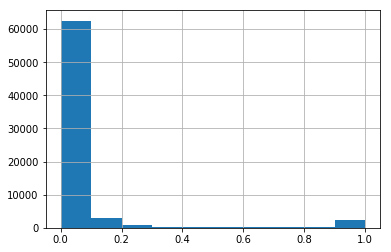

In [19]:
pd.Series(y_predict).hist()

# Importance

In [20]:
fi = model.get_feature_importance(valid_X, valid_y)

In [21]:
fi_df = pd.DataFrame()
fi_df['feat'] = numeric_features
fi_df['value'] = fi
fi_df.sort_values('value')

,feat,value
12,cat_var_9_ord,0.527380
13,cat_var_12_ord,1.089233
14,cat_var_13_ord,1.292177
15,cat_var_16_ord,1.382612
17,cat_var_18_ord,1.973306
1,num_var_1,2.164203
16,cat_var_17_ord,2.223225
4,num_var_5,2.565859
2,num_var_2,2.855696
10,cat_var_6_ord,3.005054


# Criar CSV para submissão

In [22]:
test_f_df.shape

(523466, 18)

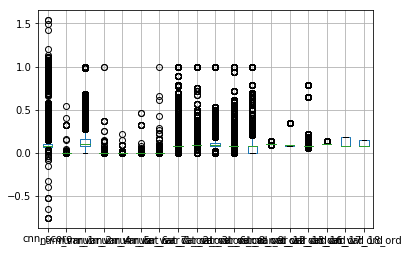

In [23]:
test_f_df.boxplot()

In [24]:
y_predict = model.predict_proba(test_f_df.as_matrix())[:,1]
#y_predict = model.predict(test_f_df.as_matrix())

In [25]:
test_df = pd.read_csv("../input/test.csv")

In [26]:
sample_submission_df = pd.DataFrame()

sample_submission_df['transaction_id'] = test_df['transaction_id']
sample_submission_df['target'] = y_predict
sample_submission_df.head()

,transaction_id,target
0,id_1,0.004137
1,id_6,0.169504
2,id_9,0.005544
3,id_14,0.029612
4,id_15,0.065091


In [27]:
sample_submission_df.to_csv('submission.csv', index=False)

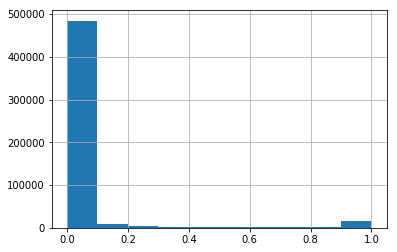

In [28]:
sample_submission_df['target'].hist()